In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\Bharath\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\Bharath\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\Bharath\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import time

In [3]:
DATA_DIR = "./../data"
YELP_REVIEW_DATASET_PROCESSED = DATA_DIR + "/smart_swiping_review_subset_dataset.csv"
YELP_TIP_DATASET_PROCESSED = DATA_DIR + "/smart_swiping_processed_tip_dataset.csv"

In [4]:
review_df = pd.read_csv(YELP_REVIEW_DATASET_PROCESSED)
review_df

,text
0,If you decide to eat
1,here just be
2,going
3,it
4,want
...,...
5494023,broth is great
5494024,worth
5494025,keep going back
5494026,sorry


In [5]:
tip_df = pd.read_csv(YELP_TIP_DATASET_PROCESSED)
tip_df

,text
0,Avengers time with the ladies
1,They have lots of good
2,deserts and tasty cuban sandwiches
3,It's open even when
4,Very decent fried chicken
...,...
1797257,of
1797258,Great food and service
1797259,Love their Cubans
1797260,Great pizza great price


In [6]:
final_df = pd.concat([ review_df, tip_df ] )
final_df

,text
0,If you decide to eat
1,here just be
2,going
3,it
4,want
...,...
1797257,of
1797258,Great food and service
1797259,Love their Cubans
1797260,Great pizza great price


In [7]:
final_df["simulated"] = final_df["text"]
final_df

,text,simulated
0,If you decide to eat,If you decide to eat
1,here just be,here just be
2,going,going
3,it,it
4,want,want
...,...,...
1797257,of,of
1797258,Great food and service,Great food and service
1797259,Love their Cubans,Love their Cubans
1797260,Great pizza great price,Great pizza great price


In [8]:
final_df.isna().sum()

text         105
simulated    105
dtype: int64

In [9]:
final_df.dropna(subset=['text'],inplace= True)
final_df.isna().sum()

text         0
simulated    0
dtype: int64

In [10]:
final_df.rename(columns = {'text':'simulated', "simulated" : "text"}, inplace = True) 
final_df

,simulated,text
0,If you decide to eat,If you decide to eat
1,here just be,here just be
2,going,going
3,it,it
4,want,want
...,...,...
1797257,of,of
1797258,Great food and service,Great food and service
1797259,Love their Cubans,Love their Cubans
1797260,Great pizza great price,Great pizza great price


In [11]:

final_df['word_count'] = final_df['text'].str.split().apply(len)
final_df['word_count']
   

0          5
1          3
2          1
3          1
4          1
          ..
1797257    1
1797258    4
1797259    3
1797260    4
1797261    3
Name: word_count, Length: 7291185, dtype: int64

In [12]:
final_df

,simulated,text,word_count
0,If you decide to eat,If you decide to eat,5
1,here just be,here just be,3
2,going,going,1
3,it,it,1
4,want,want,1
...,...,...,...
1797257,of,of,1
1797258,Great food and service,Great food and service,4
1797259,Love their Cubans,Love their Cubans,3
1797260,Great pizza great price,Great pizza great price,4


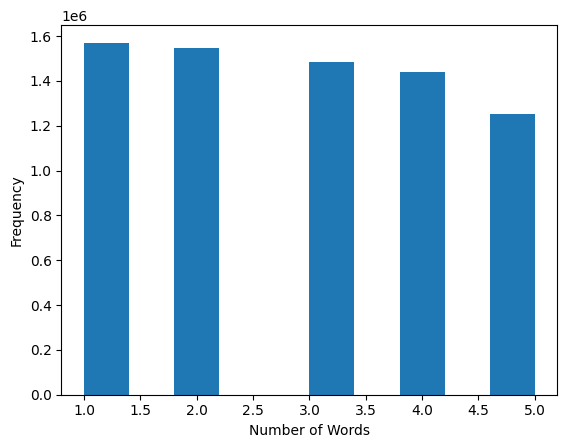

In [13]:
import matplotlib.pyplot as plt

plt.hist(final_df['word_count'])
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [14]:
import os
os.chdir("./../")

In [15]:
from keyboard import KeyBoard
keyBoard = KeyBoard()

In [19]:
keyBoard.simulate("I")

'I'

In [20]:
keyBoard.simulate("HI")

'hjui'

In [21]:
sample = final_df.iloc[0,:]["simulated"]

print(" Original : ", sample )
print(" Simulated : ", keyBoard.simulate(sample) )

 Original :  If you decide to eat
 Simulated :  iuhgfgyuioiuytrderdfcvghuiuytfdertyuioiuytrewaswert


In [22]:
def check(words):
    ch = str(words).replace("'","").replace('"',"").replace(" ","")

    return ch.isalpha() and ch.isascii()

final_df[final_df["text"].apply( check) == False]

,simulated,text,word_count
394,entrées,entrées,1
998,love Phò so,love Phò so,3
4211,décor in,décor in,2
6239,niçoise olives and balsamic vinaigrette,niçoise olives and balsamic vinaigrette,5
8764,Even entrées like Dall Fray,Even entrées like Dall Fray,5
...,...,...,...
1793767,非常满意,非常满意,1
1793889,Mala atención por una,Mala atención por una,4
1794545,Yum Creme' brûlée French toast,Yum Creme' brûlée French toast,5
1795531,Malísima,Malísima,1


In [23]:
final_df = final_df[final_df["text"].apply( check) == True]
final_df

,simulated,text,word_count
0,If you decide to eat,If you decide to eat,5
1,here just be,here just be,3
2,going,going,1
3,it,it,1
4,want,want,1
...,...,...,...
1797257,of,of,1
1797258,Great food and service,Great food and service,4
1797259,Love their Cubans,Love their Cubans,3
1797260,Great pizza great price,Great pizza great price,4


In [24]:
final_df[final_df["text"].apply( check) == False]

,simulated,text,word_count


In [25]:
count = 0 
started_time = time.time()

def simulator(words: str):
    global count, started_time
    count+=1

    if (count % (10 * 1000) == 0):
        print("Total rows processed : ", count , f" and total time taken { time.time() - started_time } secs")

    words = words.replace('\'','').replace('"','')
    return keyBoard.simulate(words)


final_df["simulated"] = final_df["simulated"].apply(simulator)
final_df


Total rows processed :  10000  and total time taken 8.15354061126709 secs
Total rows processed :  20000  and total time taken 16.824037551879883 secs
Total rows processed :  30000  and total time taken 24.806485176086426 secs
Total rows processed :  40000  and total time taken 33.5388720035553 secs
Total rows processed :  50000  and total time taken 42.12234807014465 secs
Total rows processed :  60000  and total time taken 50.27754831314087 secs
Total rows processed :  70000  and total time taken 58.8355975151062 secs
Total rows processed :  80000  and total time taken 67.3237533569336 secs
Total rows processed :  90000  and total time taken 76.16413879394531 secs
Total rows processed :  100000  and total time taken 84.47756457328796 secs
Total rows processed :  110000  and total time taken 93.21068787574768 secs
Total rows processed :  120000  and total time taken 101.88219547271729 secs
Total rows processed :  130000  and total time taken 110.02922344207764 secs
Total rows processed 

C:\Users\Bharath\AppData\Local\Temp\ipykernel_28368\426516255.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["simulated"] = final_df["simulated"].apply(simulator)


,simulated,text,word_count
0,iuytgfgtyuioiuytfdedfcfghyuiuygfdertyuioiuytre...,If you decide to eat,5
1,hgtrerertyuhjuytresdertygbvgfre,here just be,3
2,ghuioijnbhgy,going,1
3,iuyt,it,1
4,wasdfghnjhyt,want,1
...,...,...,...
1797257,oiuygf,of,1
1797258,gtrewasertfghuioiuytrdsasdfghjnjhgfdsertgvbhju...,Great food and service,4
1797259,loiujhvgfrertyhgfdertyuiuytrfcvgyuhbvgfdsasdfg...,Love their Cubans,3
1797260,gftrewertyuiopoiuhgcxzsasdfgftrewawertyuiopoiu...,Great pizza great price,4


In [27]:
final_df.drop(["word_count"],  axis=1, inplace=True )
final_df

C:\Users\Bharath\AppData\Local\Temp\ipykernel_28368\2928329840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(["word_count"],  axis=1, inplace=True )


,simulated,text
0,iuytgfgtyuioiuytfdedfcfghyuiuygfdertyuioiuytre...,If you decide to eat
1,hgtrerertyuhjuytresdertygbvgfre,here just be
2,ghuioijnbhgy,going
3,iuyt,it
4,wasdfghnjhyt,want
...,...,...
1797257,oiuygf,of
1797258,gtrewasertfghuioiuytrdsasdfghjnjhgfdsertgvbhju...,Great food and service
1797259,loiujhvgfrertyhgfdertyuiuytrfcvgyuhbvgfdsasdfg...,Love their Cubans
1797260,gftrewertyuiopoiuhgcxzsasdfgftrewawertyuiopoiu...,Great pizza great price


In [28]:
#Check empty simulated text for single 
final_df[ final_df["simulated"].apply(len) == 0]

,simulated,text


In [29]:
final_df.to_csv('./data/smart_swiping_dataset.csv',index=False)